In [1]:
import pandas as pd

In [7]:
from sklearn.datasets import fetch_california_housing

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df=fetch_california_housing()

In [11]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [14]:
dataset=pd.DataFrame(df.data)

In [15]:
dataset.columns=df.feature_names

In [16]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [19]:
X=dataset
y=df.target

In [45]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [46]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [54]:
y_train

array([1.938, 1.697, 2.598, ..., 2.221, 2.835, 3.25 ])

In [55]:
# standarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [56]:
X_train=scaler.fit_transform(X_train)

In [57]:
X_test = scaler.transform(X_test)

In [58]:
X_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [70]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [71]:
regression

LinearRegression()

In [66]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [67]:
np.mean(mse)

-0.5257104326777

In [73]:
#prediction 
reg_pred=regression.predict(X_test)

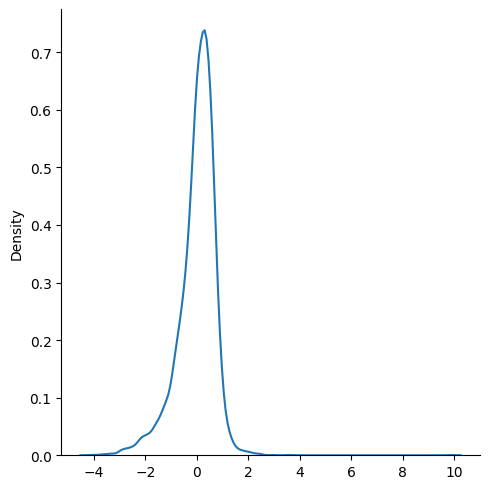

In [77]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [78]:
from sklearn.metrics import r2_score

In [80]:
score=r2_score(reg_pred,y_test)

In [81]:
score

0.3451339380943985